# Entregável 1 - visão computacional

Alunos: Henrique Mualem Marti e Edgard Ortiz

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

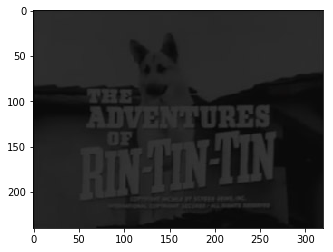

In [16]:
rintin = cv2.imread("RinTinTin.jpg")
plt.imshow(rintin)

In [17]:
rintin.shape

(240, 320, 3)

In [18]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [19]:
rintin_gray.shape

(240, 320)

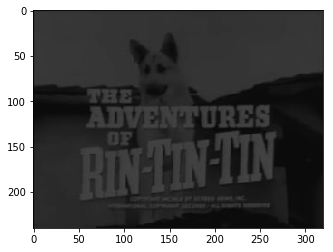

In [20]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

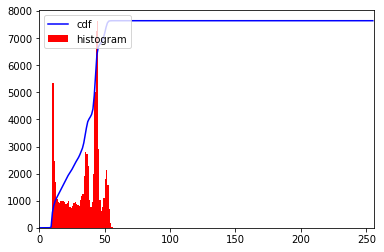

In [21]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores? -Não!
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

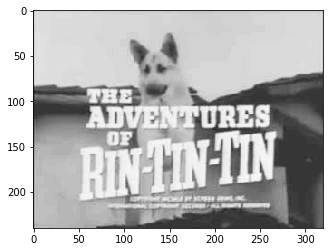

In [22]:
saida = np.zeros((240, 320), dtype=np.uint8)

imagem_gray = rintin_gray

for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = 4.4*imagem_gray[i][j]
        
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

<function matplotlib.pyplot.show(*args, **kw)>

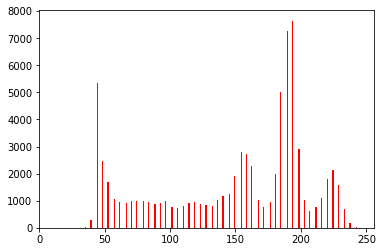

In [23]:
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show

In [24]:
conta = 0
for i in range(saida.shape[0]):
    for j in range(saida.shape[1]):
        if saida[i][j] > 254:
            conta += 1
print(conta)

1


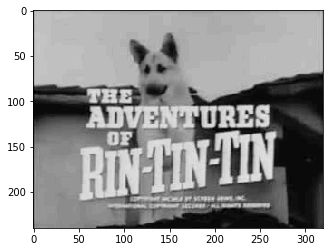

In [25]:
saidain = np.zeros((240, 320), dtype=np.uint8)

for i in range(saida.shape[0]):
    for j in range(saida.shape[1]):
        saidain[i][j] = saida[i][j] - 35
        
plt.imshow(saidain, cmap="Greys_r", vmin=0, vmax=255)    

<function matplotlib.pyplot.show(*args, **kw)>

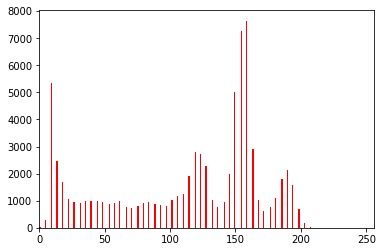

In [26]:
plt.hist(saidain.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show

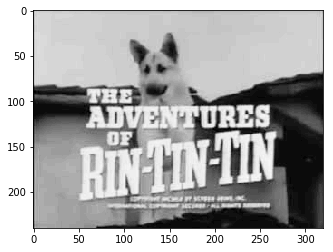

In [27]:
saidain2 = np.zeros((240, 320), dtype=np.uint8)

for i in range(saidain.shape[0]):
    for j in range(saidain.shape[1]):
        saidain2[i][j] = saidain[i][j] * 1.159090
        
plt.imshow(saidain2, cmap="Greys_r", vmin=0, vmax=255) 

<function matplotlib.pyplot.show(*args, **kw)>

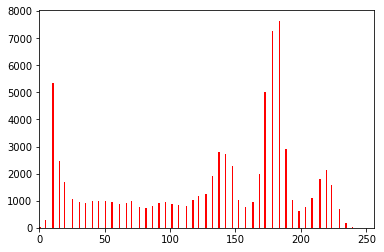

In [28]:
plt.hist(saidain2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show

#### Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


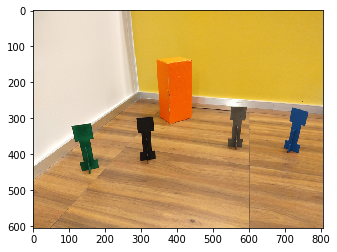

In [29]:
img = cv2.imread("cena_canto_sala.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

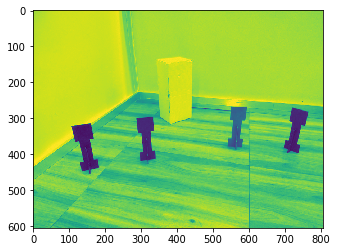

In [33]:
imgr = img[:,:,0]
plt.imshow(imgr)

<function matplotlib.pyplot.show(*args, **kw)>

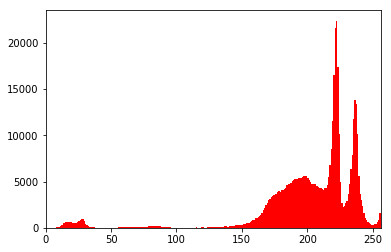

In [34]:
plt.hist(imgr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show

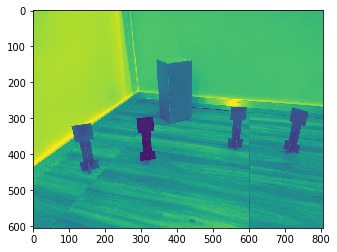

In [31]:
imgb = img[:,:,1]
plt.imshow(imgb)

<function matplotlib.pyplot.show(*args, **kw)>

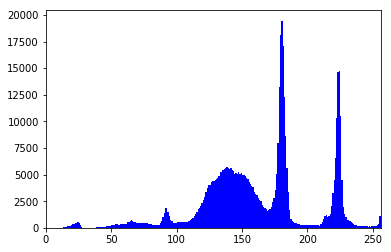

In [36]:
plt.hist(imgb.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>